In [1]:
#Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

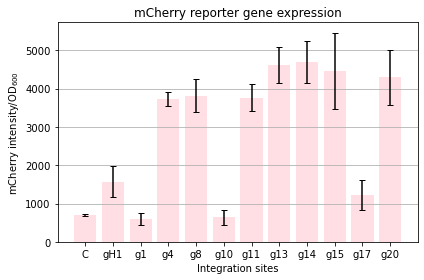

In [5]:
df = pd.read_excel('mCherry Synthetic Complete triplicate measurement.xlsx')

# Create lists for the plot
site_name = list(df['site'])
x_pos = np.arange(len(site_name))
mean_fi = list(df['mean'])
error_fi = list(df['std'])

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, mean_fi, yerr=error_fi, align='center', alpha=0.5, capsize=3, color = 'pink')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
ax.set_xlabel('Integration sites')
ax.set_ylabel('$mCherry\ intensity/OD_{600}$')
ax.set_xticks(x_pos)
ax.set_xticklabels(site_name)
ax.set_title('mCherry reporter gene expression')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Normalized mCherry SC.png', dpi = 400)
#plt.show()

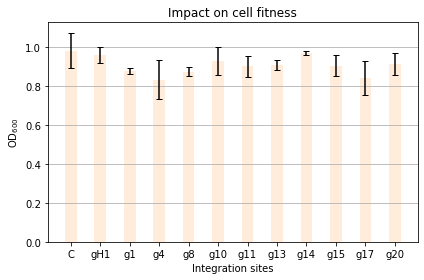

In [31]:
df = pd.read_excel('mCherry Synthetic Complete triplicate measurement.xlsx', sheet_name='Sheet2')

# Create lists for the plot
site_name = list(df['site'])
x_pos = np.arange(len(site_name))
mean_od = list(df['mean'])
error_od = list(df['std'])

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, mean_od, yerr=error_od, align='center', alpha=0.5, capsize=3, color = 'peachpuff')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
ax.set_xlabel('Integration sites')
ax.set_ylabel('$OD_{600}$')
ax.set_xticks(x_pos)
ax.set_xticklabels(site_name)
ax.set_title('Impact on cell fitness')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Growth SC.png', dpi = 400)
#plt.show()

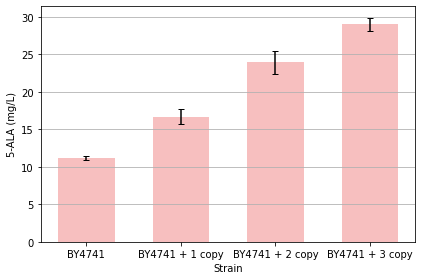

In [32]:
df = pd.read_excel('Ab ALA production.xlsx')

# Create lists for the plot
strain_name = list(df['strain'])
x_pos = np.arange(len(strain_name))
mean_t = list(df['average'])
error_t = list(df['stdev'])

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, mean_t, yerr=error_t, align='center', alpha=0.5, capsize=3, color = 'lightcoral', width=0.6)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
ax.set_xlabel('Strain')
ax.set_ylabel('5-ALA (mg/L)')
ax.set_xticks(x_pos)
ax.set_xticklabels(strain_name)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('5-ALA quantification.png', dpi = 400)
#plt.show()

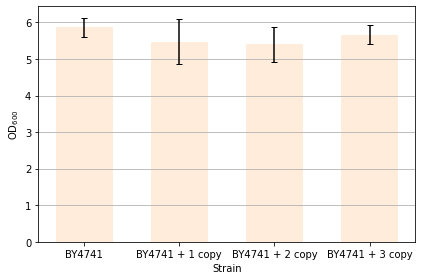

In [35]:
df = pd.read_excel('Ab ALA production.xlsx', sheet_name='Sheet2')

# Create lists for the plot
strain_name = list(df['strain'])
x_pos = np.arange(len(strain_name))
mean_od = list(df['average'])
error_od = list(df['stdev'])

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, mean_od, yerr=error_od, align='center', alpha=0.5, capsize=3, color = 'peachpuff', width=0.6)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
ax.set_xlabel('Strain')
ax.set_ylabel('$OD_{600}$')
ax.set_xticks(x_pos)
ax.set_xticklabels(strain_name)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Growth 5-ALA strain.png', dpi = 400)
#plt.show()

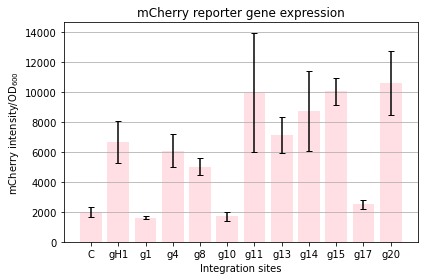

In [6]:
df = pd.read_excel('mCherry YPD triplicate measurement.xlsx')

# Create lists for the plot
site_name = list(df['Site'])
x_pos = np.arange(len(site_name))
mean_fi = list(df['Mean'])
error_fi = list(df['Std Deviation'])

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, mean_fi, yerr=error_fi, align='center', alpha=0.5, capsize=3, color = 'pink')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
ax.set_xlabel('Integration sites')
ax.set_ylabel('$mCherry\ intensity/OD_{600}$')
ax.set_xticks(x_pos)
ax.set_xticklabels(site_name)
ax.set_title('mCherry reporter gene expression')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Normalized mCherry YPD.png', dpi = 400)
#plt.show()

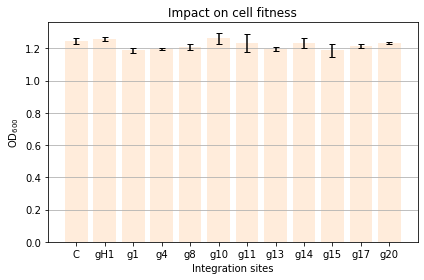

In [5]:
df = pd.read_excel('mCherry YPD triplicate measurement.xlsx', sheet_name='Sheet2')

# Create lists for the plot
site_name = list(df['Site'])
x_pos = np.arange(len(site_name))
mean_od = list(df['Mean'])
error_od = list(df['Std Deviation'])

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, mean_od, yerr=error_od, align='center', alpha=0.5, capsize=3, color = 'peachpuff')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
ax.set_xlabel('Integration sites')
ax.set_ylabel('$OD_{600}$')
ax.set_xticks(x_pos)
ax.set_xticklabels(site_name)
ax.set_title('Impact on cell fitness')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('Growth YPD.png', dpi = 400)
#plt.show()

best fit line:
y = 0.0815 + 0.0548x


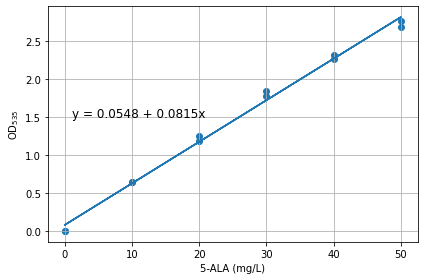

In [24]:
#Calibration Curve
df = pd.read_excel('Ab ALA production.xlsx', sheet_name='Sheet4')

# Create lists for the plot
conc = list(df['mg/L'])
od_535 = list(df['OD535-blank'])

def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.4f} + {:.4f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(conc, od_535)

# plot points and fit line
plt.scatter(conc, od_535)
yfit = [a + b * xi for xi in conc]
plt.plot(conc, yfit)
plt.xlabel('5-ALA (mg/L)')
plt.ylabel('$OD_{535}$')
plt.text(1, 1.5, 'y = ' + '{:.4f}'.format(b) + ' + {:.4f}'.format(a) + 'x', size=12, fontfamily = 'sans-serif')
plt.tight_layout()
plt.grid(True)
plt.grid(True)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.savefig('5-ALA Calibration curve.png', dpi = 400)